In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.mixture import GaussianMixture

Leer los datos del primer dataframe

In [8]:
data = pd.read_csv("diamonds.csv", index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


¿Cuantos registros tengo en total?

In [97]:
data.shape[0]

53930

¿Que tipo de valores contiene cada columna?

In [60]:
data.info()
#respuesta, tenemos valores del tipo float64(6), int64(1), object(3)*(string)

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53930 non-null  float64
 1   cut      53930 non-null  object 
 2   color    53930 non-null  object 
 3   clarity  53930 non-null  object 
 4   depth    50968 non-null  float64
 5   table    53930 non-null  float64
 6   price    53930 non-null  int64  
 7   x        52840 non-null  float64
 8   y        53345 non-null  float64
 9   z        53930 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


## Variables Cuantitativas

### *cut*

¿Que valores existen en *cut*?

In [224]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'Very Goo!d',
       "P*'remium", 'I#deal', '#Very Good', 'P?remium', "*'Ideal",
       '!Good', 'Pre!mium', 'Pr?emium', 'Very Go#od', 'Ide&al', 'Ide!al',
       'Id!eal', '&Premium', 'Go?od', 'G#ood', "Very *'Good", "Ide*'al",
       'V&ery Good', '&Ideal', 'Very G#ood'], dtype=object)

Existen varios errores de escritura sobre la calidad del corte, entonces debemos estandarizar dichas variables

In [252]:
Quality = {"Premium":   set(["Premium","P*remium","Pr?emium","P?remium", "Pre!mium", "&Premium", "P*'remium"]),
           "Very Good": set(["Very Good", "Very Goo!d", "Very *'Good", "V&ery Good", "Very G#ood", "#Very Good", "Very Go#od"]),
           "Good":      set(["Good", "!Good", "Go?od", "G#ood"]),
           "Ideal":     set(["&Ideal", "Ide*'al", "Ide&al","I#deal", "Ideal", "I#deal", "Id!eal", "*'Ideal", "Ide!al"]),
           "Fair":      set(["Fair"])}

map_qty = lambda x: next((k for k, v in Quality.items() if x in v), x)
data["Cut"] = data['cut'].apply(map_qty)

Visualizar la distribucion por Calidad de corte

<Axes: >

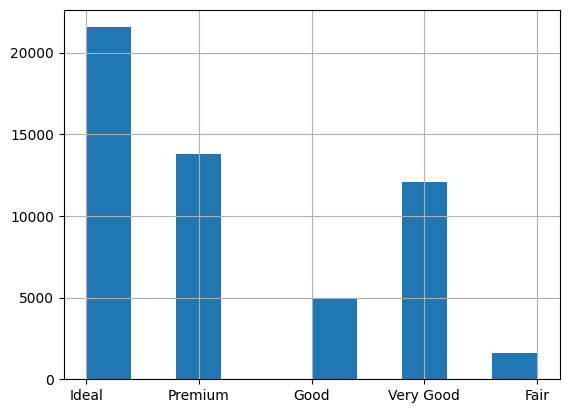

In [253]:
#data["Cut"].unique() #verificar que ya no falta un error
data["Cut"].hist()

### color

In [240]:
data["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', "*'E", '#F', '&G', '!H', '?J',
       '#D', '&I', '!I', '?G', '#H', '?H', '?E', "*'F", '!E', '&F', '#G',
       "*'I", '!F', '&E'], dtype=object)

Igual que en el anterior, notamos que existe ruido en la informacion de entrada

In [248]:
Color = {"D": set(["D", "#D"]),
         "E": set(["E","*'E", "?E", "!E", "&E"]),
         "F": set(["F","#F","*'F", "&F", "!F"]),
         "G": set(["G", "&G", "?G", "#G"]),
         "H": set(["H", "!H", "#H", "?H"]),
         "I": set(["I","&I", "!I", "*'I"]),
         "J": set(["J", "?J"])
            }

In [249]:
map_color = lambda x: next((k for k, v in Color.items() if x in v), x)
data["Color"] = data['color'].apply(map_color)

Visualizar por color

<Axes: >

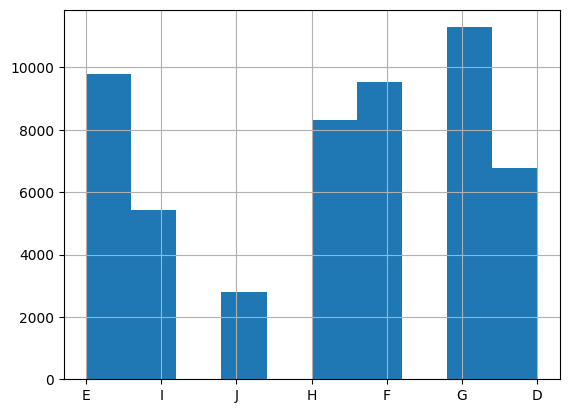

In [251]:
data["Color"].hist()

data["Color"].hist()

In [256]:
data["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF', 'S?I1',
       'SI!1', '&VS2', '&SI2', "S*'I1", 'VS?1', "S*'I2", '#VS1', 'V&S2',
       'V!S2', '!VS2', 'VS#2', "VVS*'2", "*'SI2", 'VV?S1', 'S&I1',
       "*'SI1", 'SI?1', 'VV#S1', 'V#S2', '#SI!1', 'S!I2'], dtype=object)

In [262]:
Clarity = {
    "I1": set(["I1"]), 
    "SI2": set(["SI2","&SI2", "S*'I2", "*'SI2", "S!I2"]), 
    "SI1": set(["SI1", "S?I1", "SI!1", "S*'I1", "S&I1", "*'SI1", "SI?1", "#SI!1"]), 
    "VS2": set(["VS2", "&VS2", "V&S2", "V!S2", "!VS2", "VS#2", "V#S2"]), 
    "VS1": set(["VS1","VS?1", "#VS1"]), 
    "VVS2": set(["VVS2","VVS*'2"]), 
    "VVS1": set(["VVS1", "VV?S1", "VV#S1"]), 
    "IF": set(["IF"])}

In [266]:
map_clarity = lambda x: next((k for k, v in Clarity.items() if x in v), x)
data["Clarity"] = data['clarity'].apply(map_clarity)

In [267]:
#data["Color"].unique() #para corroborar que cada valor es ya unico
data["Clarity"].unique()


array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<Axes: >

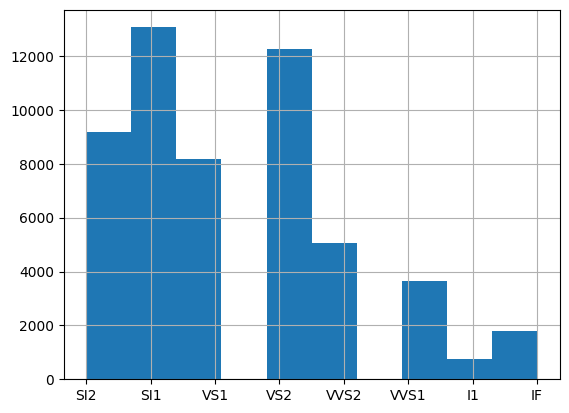

In [268]:

data["Clarity"].hist()

In [269]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,Cut,Color,Clarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium,E,SI1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good,E,VS1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium,I,VS2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good,J,SI2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53925,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Ideal,D,SI1
53926,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Good,D,SI1
53927,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Very Good,D,SI1
53928,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Premium,H,SI2


## Valores faltantes


¿Que columnas contienen valores faltantes?

In [61]:
df = data
#df[df.isnull().any(axis=1)]
missing_count = df.isnull().sum()
missing_count

carat         0
cut           0
color         0
clarity       0
depth      2962
table         0
price         0
x          1090
y           585
z             0
dtype: int64

Como se ven la cantidad de registros faltantes?

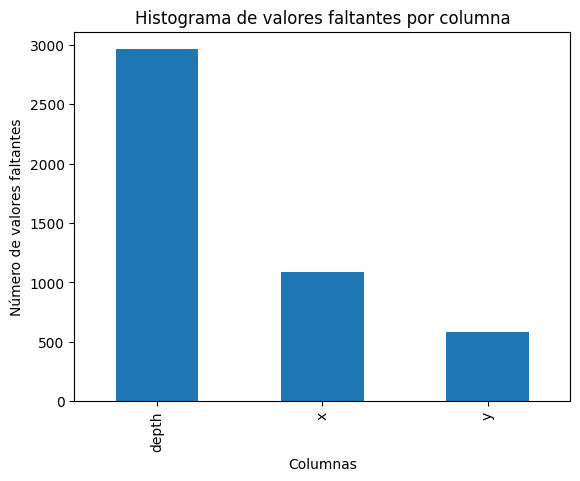

In [12]:
missing_count = missing_count[missing_count > 0]

# Crear un histograma de las columnas con valores faltantes
missing_count.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Número de valores faltantes')
plt.title('Histograma de valores faltantes por columna')
plt.show()

¿Cuantos registros completos se tienen?

In [64]:
df_clean =  df.dropna()
df_clean.shape
#respuesta: 50968

(50968, 10)

In [69]:
##registros con al menos un valor nulo
print("Existen {} registros con al menos un valor faltante".format(data.shape[0] - df_clean.shape[0]))
#Por complemento, tenemos 2962 registros con al menos un valor nulo.

Existen 2962 registros con al menos un valor faltante


**Hipotesis** Los valores de *depth* satisfacen la siguiente ecuacion: $\frac{z}{mean(x, y)}$

In [70]:
#se programa esto con el df_clean
depth_prop = round(df_clean["z"] / df_clean.loc[:, ['x', 'y']].mean(axis=1)*100, 1)
df_clean["depth_prop"] = depth_prop

C:\Users\pedro\AppData\Local\Temp\ipykernel_15468\3322390280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["depth_prop"] = depth_prop


¿Cuantos valores cumplen exactamente esta ecuacion?

In [72]:
df_clean.shape[0] - (df_clean["depth"] != df_clean["depth_prop"]).sum()
#respuesta: 47378 (92.95%) del total de 50968
47378*100/50968 #% de valores que si coinciden

92.95636477789986

¿Que pasa con los valores restantes?

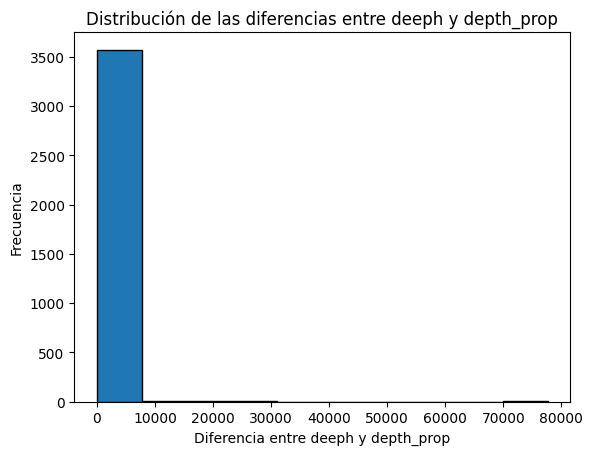

In [48]:
diferencias = df_clean["depth"] - df_clean["depth_prop"]

# Filtrar las diferencias que no son cero
diferencias_no_cero = diferencias[diferencias != 0]
abs_diff = [abs(val) for val in diferencias_no_cero]
# Graficar el histograma de las diferencias
plt.hist(abs_diff, edgecolor='black')
plt.xlabel('Diferencia entre deeph y depth_prop')
plt.ylabel('Frecuencia')
plt.title('Distribución de las diferencias entre deeph y depth_prop')
plt.show()

Y en % de diferencias con respecto al valor absoluto, como se ve esto?

In [73]:
array_np = np.array(abs_diff)

bordes = [0, 1, 10, 100, 10000]

# Contamos cuántos elementos están en cada intervalo
conteos, _ = np.histogram(array_np, bins=bordes)

print("Elementos en el intervalo [0,1):", conteos[0])
print("Elementos en el intervalo [1,10):", conteos[1])
print("Elementos en el intervalo [11,100):", conteos[2])
print("Elementos en el intervalo [100,10000):", conteos[3])

Elementos en el intervalo [0,1): 3480
Elementos en el intervalo [1,10): 59
Elementos en el intervalo [11,100): 30
Elementos en el intervalo [100,10000): 5


In [58]:
5*100/50968 #% de valores que si coinciden

0.009810076911002982

**Conclusion**

Esta hipotesis de la formula la aceptaremos como valida. De esta manera podremos hacer el primer inputacion de los datos que si tienen *x,y,z* pero no *depth*

### Eliminar registros que difieren de 1 entre depth y depth_propuesta

In [161]:
df_filtrado = df_clean[abs(df_clean['depth'] - df_clean['depth_prop']) <= 1]

¿Cuantos registros tiene este nuevo dataframe?

In [166]:
df_filtrado.shape[0]
#respuesta, 50868

50868

## Inputacion

De los 2,962 registros con al menos un valor, se investigaran aquellos casos donde la informacion faltante este en 1,2 o los 3 columnas.
Aclaracion, se hizo cada una de las busquedas, hasta llegar unicamente a los registros que se describen a continuacion 

### Caso I (Falta unicamente depth)

Primer input para la columna *depth*

In [168]:
df_missing_depth = df[df['depth'].isna() & ~df['x'].isna() & ~df['y'].isna() & ~df['z'].isna()]

¿Cuantos registros puedo inputar  con este primer metodo?

In [171]:
df_missing_depth.shape[0]
#respuesta: 1872

1872

¿Que % representa del total de registros con al menos un valor nulo?

In [87]:
1872*100/2962 
#respuesta: 63%

63.20054017555706

In [172]:
depth_input = round(df_missing_depth["z"] / df_missing_depth.loc[:, ['x', 'y']].mean(axis=1)*100, 1)
df_missing_depth["depth"] = depth_input

C:\Users\pedro\AppData\Local\Temp\ipykernel_15468\3046040852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_depth["depth"] = depth_input


¿Cuantos datos me faltan por realizar una inputacion de valores?

Gracias al primer metodo, tenemos  una recuperacion del 63.2% de datos faltantes
Los 1872 datos faltantes representan el 26.8% de los datos faltantes, pero solo el 3.4 % de la muestra total  (53,930)

### Caso V (Falta *x* y *depth*)

In [180]:
df_missing_depth_x = df[df['depth'].isna() & df['x'].isna() & ~df['y'].isna() & df['depth'].isna()]
df_missing_depth_x.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
188,0.71,Very Good,F,VS2,NaN,57.0,2777,NaN,5.69,3.56
302,0.82,Ideal,F,SI2,NaN,54.0,2799,NaN,6.02,3.74
372,0.73,Very Good,D,SI1,NaN,57.0,2808,NaN,5.70,3.61
509,0.70,Ideal,D,SI1,NaN,54.0,2822,NaN,5.71,3.52
538,0.79,Premium,H,VVS2,NaN,58.0,2827,NaN,5.90,3.71


¿Como hacer la imputacion? Como $depth =\frac{z}{mean(x, y)}$, y si conocemos *z, y*, solo es encesario imputar estadisticamente el valor de *x*. Esto lo haremos a travez de imputacion de la media, sobre los *k* vecinos mas cercanos

In [201]:
df_complet = pd.concat([df_filtrado, df_missing_depth]) 
df_pre_imput = pd.concat([df_complet,df_missing_depth_x])

In [205]:
df_complet["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'Very Goo!d',
       "P*'remium", 'I#deal', '#Very Good', 'P?remium', "*'Ideal",
       '!Good', 'Pre!mium', 'Pr?emium', 'Very Go#od', 'Ide&al', 'Id!eal',
       '&Premium', 'Go?od', 'G#ood', "Very *'Good", "Ide*'al",
       'V&ery Good', '&Ideal', 'Very G#ood'], dtype=object)

In [221]:
mapear_valor = lambda x: next((k for k, v in Quality.items() if x in v), x)
df_complet["Cut"] = df_complet['cut'].apply(mapear_valor)

In [222]:
df_complet["Cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [184]:
datos_conocidos = df_pre_imput[df_pre_imput['x'].notna()]
datos_faltantes = df_pre_imput[df_pre_imput['x'].isna()]

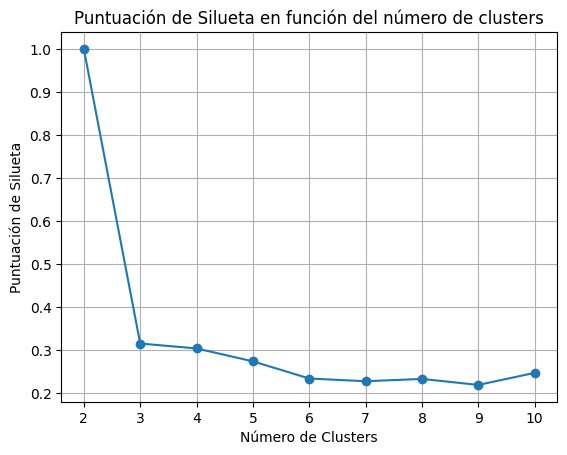

In [198]:
from sklearn.metrics import silhouette_score

n_clusters_range = range(2, 11)  # Probamos con 2 a 10 clusters
silhouette_scores = []
datos = df_complet[['carat', 'depth', 'table', 'x', 'y', 'z']]
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(datos)
    silhouette_avg = silhouette_score(datos, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficamos los valores de la puntuación de la silueta en función del número de clusters
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Puntuación de Silueta en función del número de clusters')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

In [196]:
n_clusters_range = range(2, 11)  # Probamos con 2 a 10 clusters
bic_values = []
datos = df_complet[['carat', 'depth', 'table', 'x', 'y', 'z']]
for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(datos)
    bic = gmm.bic(datos)
    bic_values.append(bic)

# Encontramos el número óptimo de clusters que minimiza el BIC
optimal_n_clusters = n_clusters_range[np.argmin(bic_values)]
print("Número óptimo de clusters según BIC:", optimal_n_clusters)

Número óptimo de clusters según BIC: 10


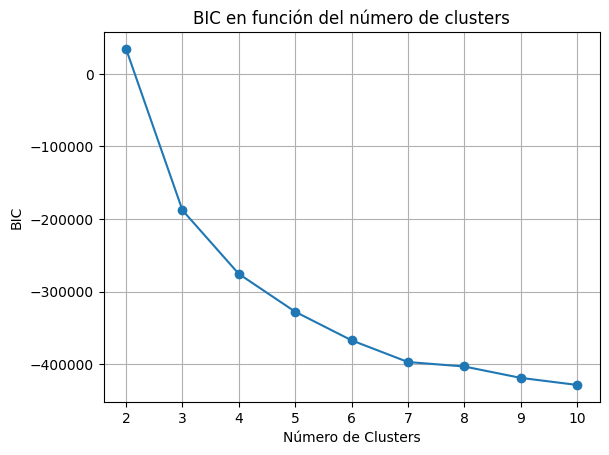

In [197]:
plt.plot(n_clusters_range, bic_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('BIC')
plt.title('BIC en función del número de clusters')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

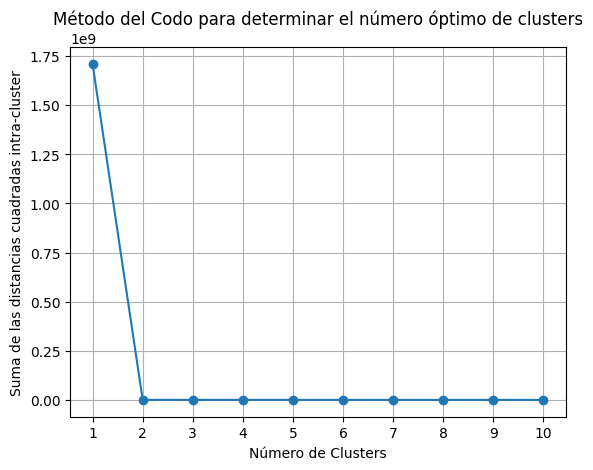

In [199]:
n_clusters_range = range(1, 11)  # Probamos con 1 a 10 clusters
inertia_values = []
datos = df_complet[['carat', 'depth', 'table', 'x', 'y', 'z']]
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(datos)
    inertia_values.append(kmeans.inertia_)

# Graficamos la suma de las distancias cuadradas intra-cluster en función del número de clusters
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de las distancias cuadradas intra-cluster')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

### Caso VII (Taltan las 3)

In [150]:
registros_con_valores_faltantes_y_z_depth = df[df['x'].isna() & df['y'].isna() & df['depth'].isna()]
registros_con_valores_faltantes_y_z_depth

,carat,cut,color,clarity,depth,table,price,x,y,z
73,0.30,Premium,H,SI1,NaN,57.0,554,NaN,NaN,2.67
345,0.70,Very Good,D,SI1,NaN,58.0,2804,NaN,NaN,3.56
544,0.80,Good,E,SI2,NaN,54.0,2829,NaN,NaN,3.75
553,0.53,Ideal,F,VVS1,NaN,57.0,2830,NaN,NaN,3.20
592,0.70,Ideal,E,VS1,NaN,56.0,2837,NaN,NaN,3.53
...,...,...,...,...,...,...,...,...,...,...
53611,0.35,Premium,I,VS1,NaN,60.0,552,NaN,NaN,2.78
53690,0.70,Ideal,F,VS2,NaN,56.0,2717,NaN,NaN,3.51
53719,0.57,Ideal,F,VVS2,NaN,56.0,2722,NaN,NaN,3.25
53904,0.84,Good,I,VS1,NaN,59.0,2753,NaN,NaN,3.77


In [156]:
585*100/2962

19.75016880486158

In [151]:
585+505+1872

2962

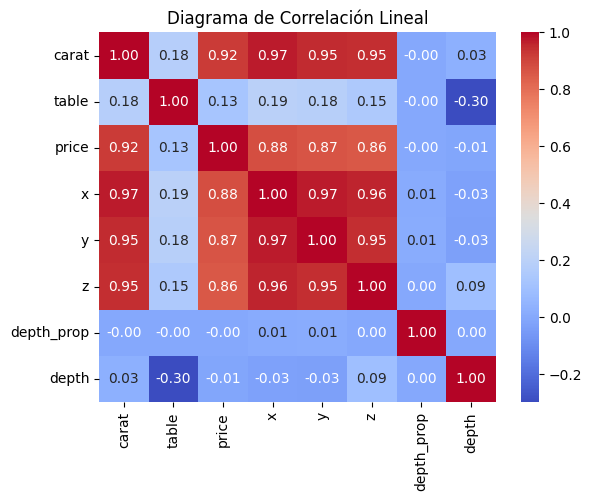

In [71]:
correlation_matrix = df.corr()

# Crear el diagrama de correlación lineal
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Diagrama de Correlación Lineal')
plt.show()


df_clean